## DATE - 26\10\2023

## TEAM ID - 3884

## PROJECT TITLE - Age Based Customer Segmentation Using Data Science

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR  
from sklearn.linear_model import LinearRegression


In [6]:
dataset= pd.read_csv("C:\\Users\\sowen\\Downloads\\Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Data Exploration

In [7]:
dataset


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
dataset.drop('CustomerID', axis=1, inplace=True)
dataset.drop('Genre', axis=1, inplace=True)
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [10]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
dataset.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## Data Visualization

## 1.Histogram 

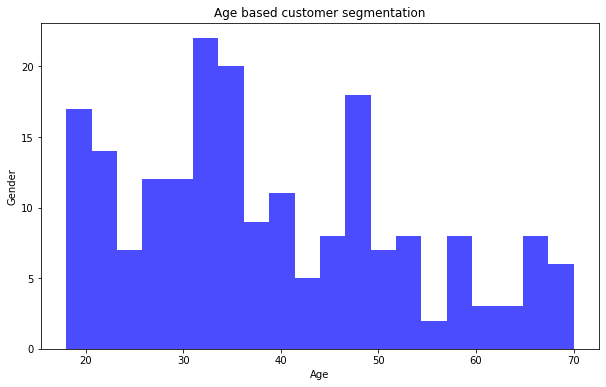

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(dataset['Age'], bins=20, color='blue', alpha=0.7)
plt.title('Age based customer segmentation')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

## 2. Bar chart

<Figure size 864x432 with 0 Axes>

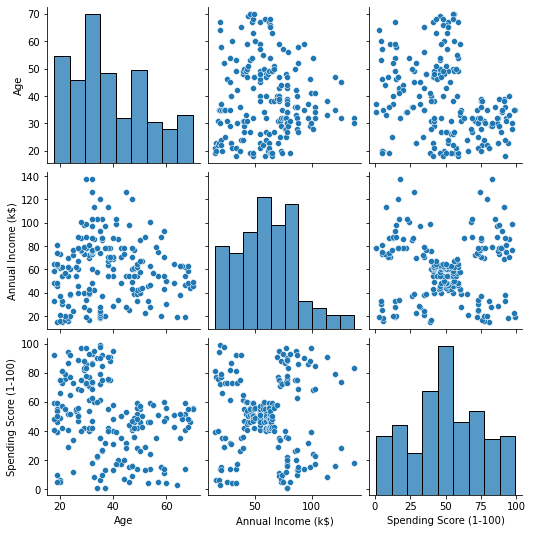

In [13]:
plt.figure(figsize=(12,6))
sns.pairplot(dataset)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}>],
       [<AxesSubplot:title={'center':'Spending Score (1-100)'}>,
        <AxesSubplot:>]], dtype=object)

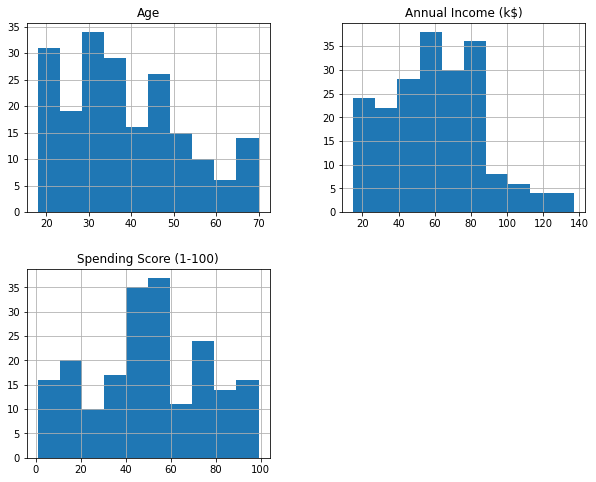

In [14]:
dataset.hist(figsize=(10,8))

## Visualising Correlation

In [15]:
dataset.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

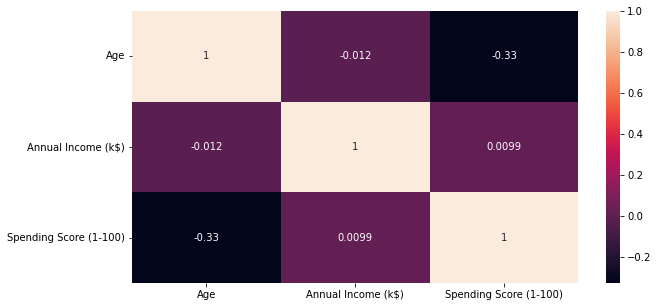

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)

## By using PCA  Algorithm

In [17]:
X = dataset.drop('Spending Score (1-100)', axis=1)
y = dataset['Spending Score (1-100)']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_components = 2

In [18]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 483.55682175408344


## Training model:1_ Decision Tree Regressor

In [19]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1073.35


## Training model:2_Support vector machine algorithm

In [20]:
svm = SVR(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)


SVR()

In [21]:
y_pred = svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 524.8207652112172


## Training model:3_Linear Regression

In [23]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 483.55682175408344
R-squared (R2): 0.01963177813218009
